<h1> Regresión de Huber</h1>
La pérdida de Huber es una función de pérdida robusta para problemas de regresión definida como:

$$
\zeta \left( y - \hat{y} \right)^{2}  =

\begin{cases}

\left( y - \hat{y} \right)^{2} ... \left| y - \hat{y}\right| \le \alpha 
\\
\left| y - \hat{y} \right| ... \left| y - \hat{y} \right| \gt  \alpha 
\end{cases}
$$

donde y es la variable objetivo, ŷ son las predicciones correspondientes y α ∈ ℝ⁺ es un hiperparámetro. Resulta tentador considerar esta pérdida como la función de log-verosimilitud de una distribución de error subyacente de cola pesada. De hecho, para los errores absolutos menores que α la distribución correspondiente se asemeja a la distribución normal, fuera de esta región coincide con la distribución de Laplace de cola más pesada. Esta es precisamente la razón por la que esta pérdida es robusta frente a los valores atípicos.

<h1> Area bajo de la curva ROC</h1>

Una curva ROC (receiver operating characteristic curve) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva traza dos parámetros:

    - Tasa de verdaderos positivos
    - Tasa de falsos positivos

La tasa de verdaderos positivos (TPR) es un sinónimo de recuperación y, por lo tanto, se define:
$$ TPR = \frac{TP}{TP+FN} $$

La tasa de falsos positivos (FPR) se define:
$$ FPR = \frac{FP}{FP+TN} $$

Una curva ROC representa la TPR frente a la FPR con diferentes umbrales de clasificación. Al reducir el umbral de clasificación, se clasifican más elementos como positivos, lo que aumenta tanto los falsos positivos como los verdaderos positivos. La siguiente figura muestra una curva ROC típica.
<img src="ROC curve.jpg">

Por su parte, el AUC(Area bajo la curva ROC) mide toda el área bidimensional bajo la curva ROC completa (cálculo integral) desde (0,0) hasta (1,1).
<img src="AUC.jpg">

El AUC proporciona una medida agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique mejor un ejemplo positivo aleatorio que un ejemplo negativo aleatorio.

<h1>Generalizacion de las medidas de desempeño para tareas multiclase y multisalida </h1>

Algunas métricas se definen esencialmente para tareas de clasificación binaria (por ejemplo, f1_score, roc_auc_score). En estos casos, por defecto sólo se evalúa la etiqueta positiva, asumiendo por defecto que la clase positiva está etiquetada como 1 (aunque esto puede ser configurable a través del parámetro pos_label).

Al extender una métrica binaria a problemas multiclase o multietiqueta, los datos se tratan como una colección de problemas binarios, uno para cada clase. Existen entonces varias formas de promediar los cálculos de la métrica binaria en el conjunto de clases, cada una de las cuales puede ser útil en algún escenario. Cuando esté disponible, deberá seleccionar entre ellas utilizando el parámetro de promedio.

    "macro" simplemente calcula la media de las métricas binarias, dando el mismo peso a cada clase. En los problemas en los que las clases poco frecuentes son, sin embargo, importantes, el macro-promedio puede ser un medio para destacar su rendimiento. Por otro lado, la suposición de que todas las clases son igual de importantes es a menudo falsa, de modo que el macro-promedio enfatizará en exceso el rendimiento típicamente bajo de una clase poco frecuente.

    "ponderado" tiene en cuenta el desequilibrio de clases calculando la media de las métricas binarias en las que la puntuación de cada clase se pondera en función de su presencia en la muestra de datos reales.

    "micro" da a cada par muestra-clase una contribución igual a la métrica global (excepto como resultado de la ponderación de la muestra). En lugar de sumar la métrica por clase, se suman los dividendos y divisores que componen las métricas por clase para calcular un cociente global. El micro-promedio puede ser preferible en entornos multietiqueta, incluida la clasificación multiclase en la que se debe ignorar una clase mayoritaria.

    "Muestras" se aplica sólo a los problemas multietiqueta. No calcula una medida por clase, sino que calcula la métrica sobre las clases verdaderas y predichas para cada muestra en los datos de evaluación, y devuelve su media (ponderada por la muestra).

    Si se selecciona average=None, se obtendrá una matriz con la puntuación de cada clase.

Mientras que los datos multiclase se proporcionan a la métrica, al igual que los objetivos binarios, como una matriz de etiquetas de clase, los datos multietiqueta se especifican como una matriz de indicadores, en la que la celda [i, j] tiene valor 1 si la muestra i tiene la etiqueta j y valor 0 en caso contrario.


In [2]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.1, 2, 8]

In [3]:
import sklearn.metrics
import tensorflow as tf
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

class performance_metrics:
    def __init__(self, y_true, y_pred):
        self.y_true = np.array(y_true)
        self.y_pred = np.array(y_pred)
        self.int_y_true = self.y_true.astype(int)
        self.int_y_pred = self.y_pred.astype(int)
    def mean_square_error(self):
        return sklearn.metrics.mean_squared_error(self.y_true, self.y_pred)
    def mean_abs_error(self):
        return sklearn.metrics.mean_absolute_error(self.y_true, self.y_pred)
    def accuracy(self):
        return sklearn.metrics.accuracy_score(self.int_y_true, self.int_y_pred)
    def cnfsn_matrix(self):
        return sklearn.metrics.confusion_matrix(self.int_y_true, self.int_y_pred)
    def precision(self):
        return sklearn.metrics.precision_score(self.int_y_true, self.int_y_pred, average=None)
    def exhaustivite(self):
        return sklearn.metrics.recall_score(self.int_y_true, self.int_y_pred,average=None)
    def f1_sc(self):
        return sklearn.metrics.f1_score(self.int_y_true, self.int_y_pred, average=None)
    def f1_ponderado(self):
        return sklearn.metrics.precision_recall_fscore_support(self.int_y_true, self.int_y_pred)
    def Huber(self):
        h = tf.keras.losses.Huber()
        return h(self.int_y_true, self.int_y_pred).numpy()
    def ROC(self):
        return sklearn.metrics.roc_curve(self.int_y_true, self.int_y_pred, pos_label = 2)
    def plot_confusion_mtrx(self):
        return sklearn.metrics.ConfusionMatrixDisplay.from_predictions(self.int_y_true, self.int_y_pred)
    def plot_ROC(self):
        return sklearn.metrics.RocCurveDisplay.from_predictions(self.int_y_true, self.int_y_pred, pos_label = 2)



        

2022-06-06 23:32:06.109714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 23:32:06.110145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
a = performance_metrics(y_true,y_pred)
a.mean_square_error()

0.40249999999999997

In [5]:
a.mean_abs_error()
a.accuracy()
a.cnfsn_matrix()
a.precision()
a.exhaustivite()
a.f1_sc()
a.f1_ponderado()


/home/anferogue/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anferogue/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anferogue/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anferogue/.local/lib/python3.8/site-packages/sklearn/metric

(array([1. , 0.5, 0. , 0. , 0. ]),
 array([1., 1., 0., 0., 0.]),
 array([1.        , 0.66666667, 0.        , 0.        , 0.        ]),
 array([1, 1, 1, 1, 0]))

In [6]:
a.Huber()
a.ROC()

2022-06-06 23:32:16.086739: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-06-06 23:32:16.087280: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-L6LJPH0): /proc/driver/nvidia/version does not exist
2022-06-06 23:32:16.090006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0., 0., 1., 1.]),
 array([9, 8, 2, 0]))

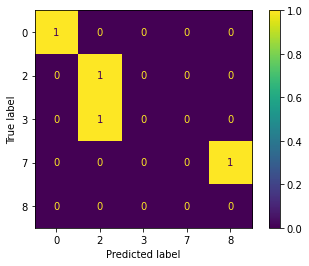

In [7]:
a.plot_confusion_mtrx()

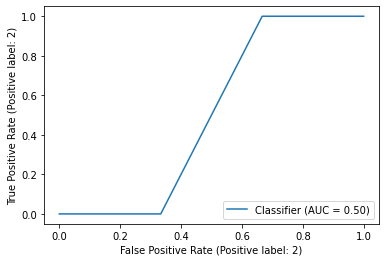

In [8]:
a.plot_ROC()